$\textbf{Excersise E}$

In [1]:
#Given
import numpy as np
import matplotlib.pyplot as plt
from Formulas import f
#Propeller Properties
span_prop = 11.4
S_prop = 19.2
mass_prop = 2359
e = 0.9
eff_prop = 0.83
P_A = 2*186*1000 # N

CD_0 = 0.025
CL_M = 1.16



1) For the propeller aircraft, plot the velocity hodograph at Sea Level, 10 000 ft and 20 000 ft (ISA) at max power.

c:\Users\sarme\OneDrive\Documenten\GitHub\Aircraft-Performance-Formulas-plus-Excersises\Formulas.py:101: RuntimeWarning: invalid value encountered in sqrt
  V_hor = np.sqrt(v**2 - R_C**2)
c:\Users\sarme\OneDrive\Documenten\GitHub\Aircraft-Performance-Formulas-plus-Excersises\Formulas.py:102: RuntimeWarning: invalid value encountered in arcsin
  gamma = np.rad2deg(np.asin(R_C/v))


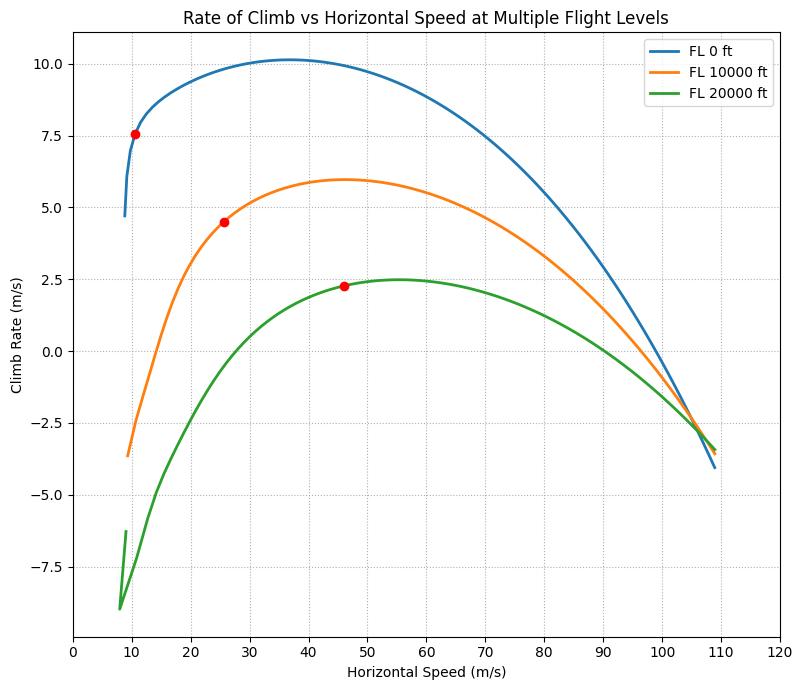

In [2]:
FL = [0, 10000 , 20000] #In feet
R_C_L = []
idx = []
V_HOR = []
V_Stall =[]
Gamma2l = []
AR_p = f.AR_Calc(span_prop,S_prop)
k = f.Induced_Drag_Factor_Calc(AR_p,e)
V_Range = np.arange(10,110,1)
for i in FL:
    P_FL0,T_FL0,Rho_FL0 =f.get_atmosphere_properties(i,'ft')
    #First Iteration gam =0
    
    P_A_E = P_A* (Rho_FL0 / 1.225)
    Thrust_A = (P_A_E*eff_prop)/V_Range

    Cl_prop = f.V_To_CL_Calc(mass_prop,V_Range,Rho_FL0,S_prop)
    Cd_prop = f.Cd_Calc(CD_0,k,Cl_prop)

    #R_C = (Thrust_A*V_Range)/(mass_prop*9.81) - V_Range*(f.Thrust_Calc(Cd_prop,Rho_FL0,V_Range,S_prop)/(mass_prop*9.81))
    #Gamma1 = np.rad2deg(np.asin(R_C/V_Range))
    R_C, _, Gamma1 = f.Rate_of_Climb(Thrust_A,mass_prop,V_Range,CD_0,k,0,Rho_FL0,S_prop)

    R_C, _, Gamma2 = f.Rate_of_Climb(Thrust_A,mass_prop,V_Range,CD_0,k,Gamma1,Rho_FL0,S_prop)
    R_C, V_hor3, Gamma3 = f.Rate_of_Climb(Thrust_A,mass_prop,V_Range,CD_0,k,Gamma2,Rho_FL0,S_prop)

    R_C_L.append(R_C)
    V_HOR.append(V_hor3)
    idx.append(np.nanargmax(Gamma3))

    Gamma2l.append(Gamma3)

    v_stall = f.V_Stall_In_Climb(mass_prop*9.81,Gamma3,Rho_FL0,S_prop,CL_M)
    V_Stall.append(v_stall)

plt.figure(figsize=(8,7))

for j, fl in enumerate(FL):

    plt.plot(V_HOR[j], R_C_L[j], linewidth=2, label=f"FL {fl} ft")
    plt.plot(V_HOR[j][idx[j]], R_C_L[j][idx[j]], "o", color="red")

    idxx = np.nanargmax(R_C_L[j]) 


plt.xlabel("Horizontal Speed (m/s)")
plt.ylabel("Climb Rate (m/s)")
plt.title("Rate of Climb vs Horizontal Speed at Multiple Flight Levels")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
xmin, xmax = plt.xlim()
plt.xticks(np.arange(np.floor(xmin/10)*10, np.ceil(xmax/10)*10 + 1, 10))

plt.show()

In [3]:
for j, fl in enumerate(FL):
    valid_indices = V_Range >= V_Stall[j]
    RC_valid = R_C_L[j][valid_indices]
    gamma_valid = Gamma2l[j][valid_indices]
    TAS_valid = V_Range[valid_indices]
    v_hor_valid = V_HOR[j][valid_indices]
    idx_max = np.argmax(RC_valid)
    RC_max_prop = RC_valid[idx_max]
    gamma_max_prop = gamma_valid[idx_max]
    v_at_max_RC = TAS_valid[idx_max]
    v_hor_at_max_RC = v_hor_valid[idx_max]

    print(f"Propeller Aircraft at {fl}:")
    print(f"  Max Rate of Climb: {RC_max_prop:.2f} m/s")
    print(f"  at TAS: {v_at_max_RC:.2f} m/s")
    print(f"  v hor at max RC: {v_hor_at_max_RC:.2f} m/s")
    print(f"  Climb angle: {gamma_max_prop:.2f} degrees")
    print("\n")

Propeller Aircraft at 0:
  Max Rate of Climb: 10.11 m/s
  at TAS: 41.00 m/s
  v hor at max RC: 39.73 m/s
  Climb angle: 14.28 degrees


Propeller Aircraft at 10000:
  Max Rate of Climb: 5.96 m/s
  at TAS: 48.00 m/s
  v hor at max RC: 47.63 m/s
  Climb angle: 7.13 degrees


Propeller Aircraft at 20000:
  Max Rate of Climb: 2.48 m/s
  at TAS: 57.00 m/s
  v hor at max RC: 56.95 m/s
  Climb angle: 2.49 degrees




In [ ]:
# Jet
span_jet = 20       # m
wingArea_jet = 65   # m2
m_jet = 25883       # kg
Cd0_jet = 0.029     # [-]
span_eff_jet = 0.9  # [-]
Cl_max_jet = 1.16   # [-]
W_jet = m_jet * g

R_C_L = []
idx = []
V_HOR = []
V_Stall =[]
Gamma2l = []
AR_p = f.AR_Calc(span_prop,S_prop)
k = f.Induced_Drag_Factor_Calc(AR_p,e)
V_Range = np.arange(10,110,1)

for i in FL:
    P_FL0,T_FL0,Rho_FL0 =f.get_atmosphere_properties(i,'ft')
    #First Iteration gam =0
    
    P_A_E = P_A* (Rho_FL0 / 1.225)
    

    Cl_prop = f.V_To_CL_Calc(mass_prop,V_Range,Rho_FL0,S_prop)
    Cd_prop = f.Cd_Calc(CD_0,k,Cl_prop)

    #R_C = (Thrust_A*V_Range)/(mass_prop*9.81) - V_Range*(f.Thrust_Calc(Cd_prop,Rho_FL0,V_Range,S_prop)/(mass_prop*9.81))
    #Gamma1 = np.rad2deg(np.asin(R_C/V_Range))
    R_C, _, Gamma1 = f.Rate_of_Climb(Thrust_A,mass_prop,V_Range,CD_0,k,0,Rho_FL0,S_prop)

    R_C, _, Gamma2 = f.Rate_of_Climb(Thrust_A,mass_prop,V_Range,CD_0,k,Gamma1,Rho_FL0,S_prop)
    R_C, V_hor3, Gamma3 = f.Rate_of_Climb(Thrust_A,mass_prop,V_Range,CD_0,k,Gamma2,Rho_FL0,S_prop)

    R_C_L.append(R_C)
    V_HOR.append(V_hor3)
    idx.append(np.nanargmax(Gamma3))

    Gamma2l.append(Gamma3)

    v_stall = f.V_Stall_In_Climb(mass_prop*9.81,Gamma3,Rho_FL0,S_prop,CL_M)
    V_Stall.append(v_stall)

plt.figure(figsize=(8,7))

for j, fl in enumerate(FL):

    plt.plot(V_HOR[j], R_C_L[j], linewidth=2, label=f"FL {fl} ft")
    plt.plot(V_HOR[j][idx[j]], R_C_L[j][idx[j]], "o", color="red")

    idxx = np.nanargmax(R_C_L[j]) 


plt.xlabel("Horizontal Speed (m/s)")
plt.ylabel("Climb Rate (m/s)")
plt.title("Rate of Climb vs Horizontal Speed at Multiple Flight Levels")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
xmin, xmax = plt.xlim()
plt.xticks(np.arange(np.floor(xmin/10)*10, np.ceil(xmax/10)*10 + 1, 10))

plt.show()